# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [841]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df = df.drop('timestamp', axis=1)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [842]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'int32']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)
encoded_df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [843]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['numTrials', 'hour']])
X_scaled = pd.DataFrame(scaled_data, columns=['numTrials', 'hour'])
X_scaled

,numTrials,hour
0,-0.788667,-2.562352
1,-0.756764,-2.562352
2,-0.724861,-2.562352
3,-0.692958,-2.562352
4,-0.661055,-2.562352
...,...,...
1681,-0.533442,0.945382
1682,-0.629151,0.945382
1683,-0.597248,0.945382
1684,-0.565345,0.945382


In [844]:
final_df = pd.concat([df['dayofweek'], X_scaled, encoded_df], axis=1)
final_df

,dayofweek,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,4,-0.788667,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,-0.756764,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,-0.724861,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,-0.692958,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,-0.661055,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,3,-0.533442,0.945382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,3,-0.629151,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,3,-0.597248,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,3,-0.565345,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [845]:
final_df.to_csv('../data/dayofweek.csv', index=False)

In [846]:
print('Naive Accuracy:', accuracy_score(y_true=final_df['dayofweek'], y_pred=[final_df['dayofweek'].mode()[0]] * len(final_df['dayofweek'])))

Naive Accuracy: 0.23487544483985764


## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [847]:
logreg_model = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
X = final_df.drop('dayofweek', axis=1)
y = final_df['dayofweek']

logreg_model.fit(X, y)

/home/zylex/S21/DS-Bootcamp/DS_Bootcamp.Day08.ID_886521-1/.env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [848]:
y_pred = logreg_model.predict(X)
print('Logistic Regression Accuracy:', accuracy_score(y_true=y, y_pred=y_pred))

Logistic Regression Accuracy: 0.6215895610913404


In [849]:
def top_features_plot(coefficients, feature_names, model_name:str, top_n:int=10):
  indices = np.argsort(coefficients)[::-1][:top_n]

  fig = plt.figure(figsize=(16, 8))
  plt.barh(feature_names[indices][::-1], coefficients[indices][::-1], color='maroon')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature Label') 
  plt.title(f'Top {top_n} Important Features of {model_name}')
  plt.legend(['weight values'])
  plt.grid(axis='x')
  plt.show()

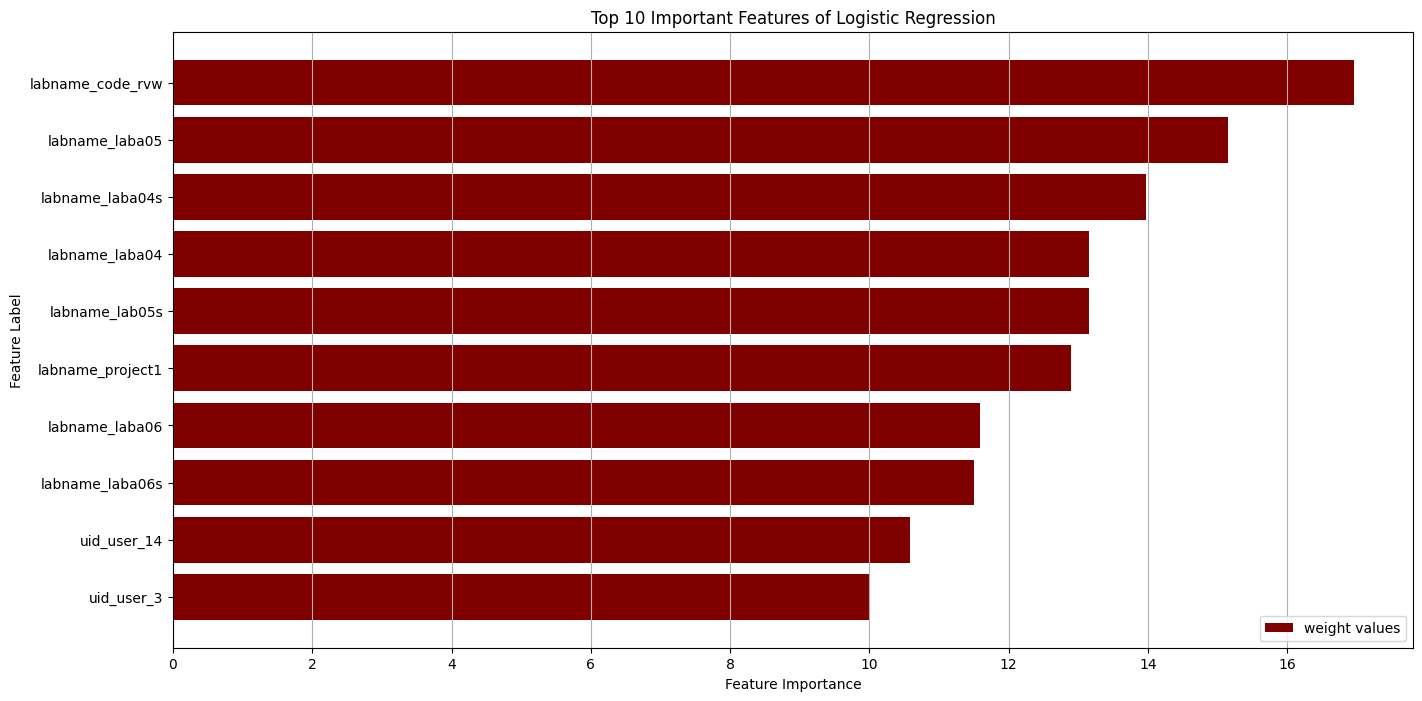

In [850]:
logreg_coefs = np.sum(np.abs(logreg_model.coef_), axis=0) # axis=0 for summing over classes
top_features_plot(
  coefficients=logreg_coefs,
  feature_names=X.columns,
  model_name='Logistic Regression',
  top_n=10
)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [851]:
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21)) # ovr: one-vs-rest method for multiclass
clf.fit(X, y)
y_pred = clf.predict(X)

In [852]:
print('SVC Accuracy:', accuracy_score(y_true=y, y_pred=y_pred))

SVC Accuracy: 0.6126927639383155


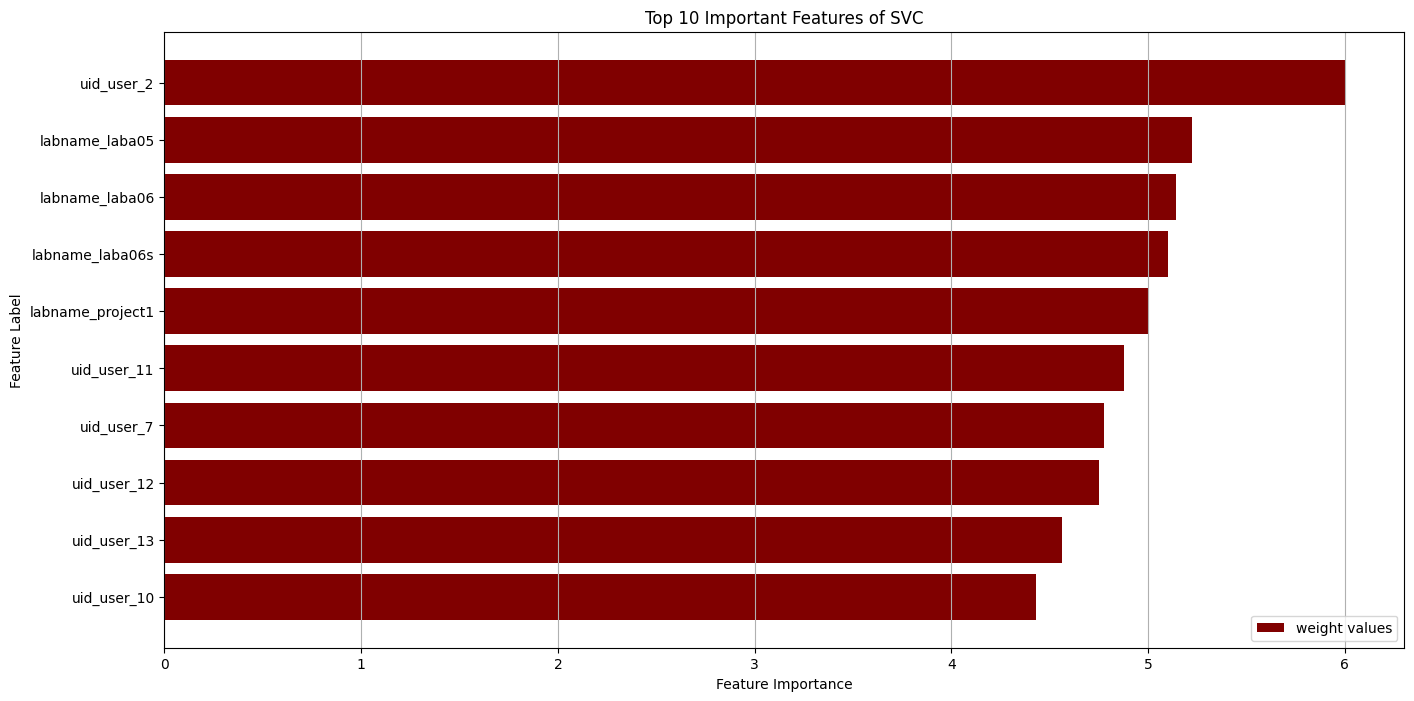

In [853]:
coefs = np.vstack([est.coef_ for est in clf.estimators_]) # np.vstack to stack arrays in sequence vertically (row wise)
svc_coefs = np.sum(np.abs(coefs), axis=0)

top_features_plot(
  coefficients=svc_coefs,
  feature_names=X.columns,
  model_name='SVC',
  top_n=10
)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [854]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=21)
dtc.fit(X, y)
y_pred = dtc.predict(X)
print('Decision Tree Classifier Accuracy:', accuracy_score(y_true=y, y_pred=y_pred))

Decision Tree Classifier Accuracy: 0.5516014234875445


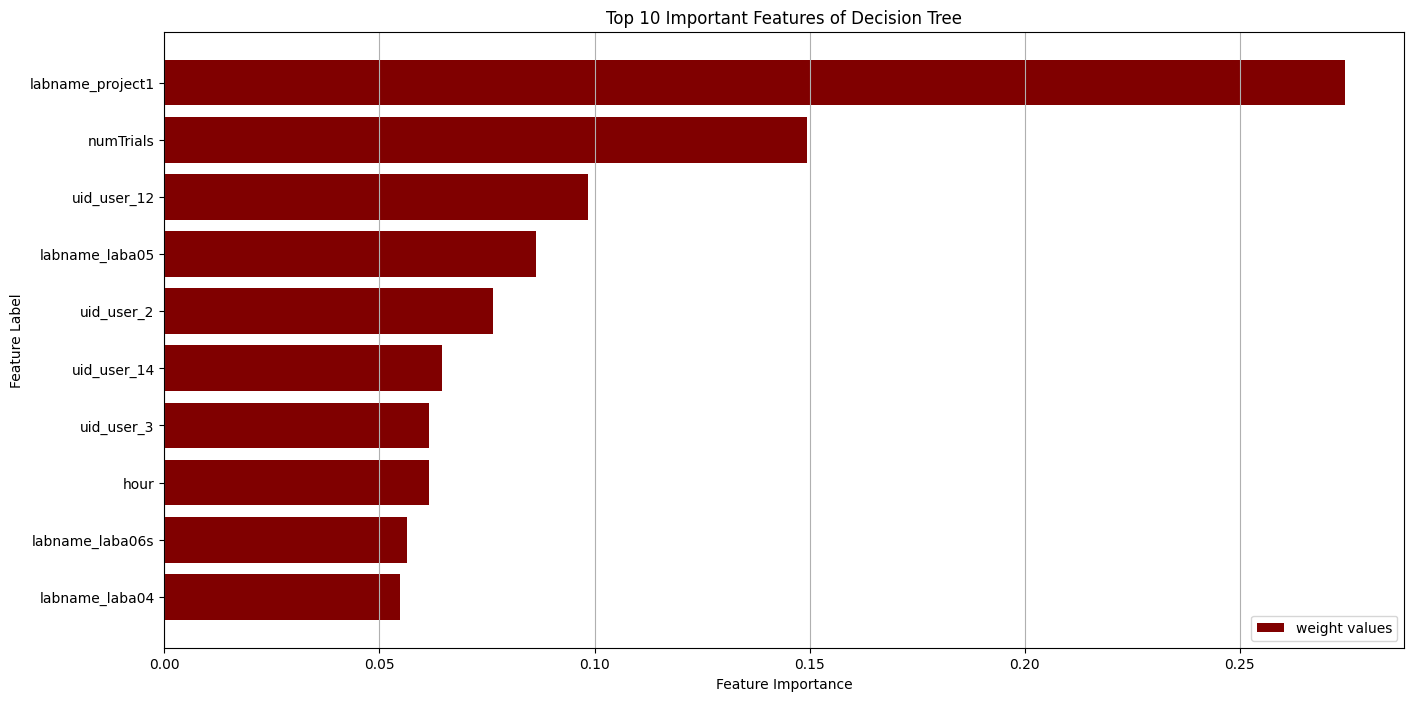

In [855]:
dtc_coefs = dtc.feature_importances_
top_features_plot(
  coefficients=dtc_coefs,
  feature_names=X.columns,
  model_name='Decision Tree',
  top_n=10
)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [856]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rfc.fit(X, y)
y_pred = rfc.predict(X)
print('Random Forest Classifier Accuracy:', accuracy_score(y_true=y, y_pred=y_pred))

Random Forest Classifier Accuracy: 1.0


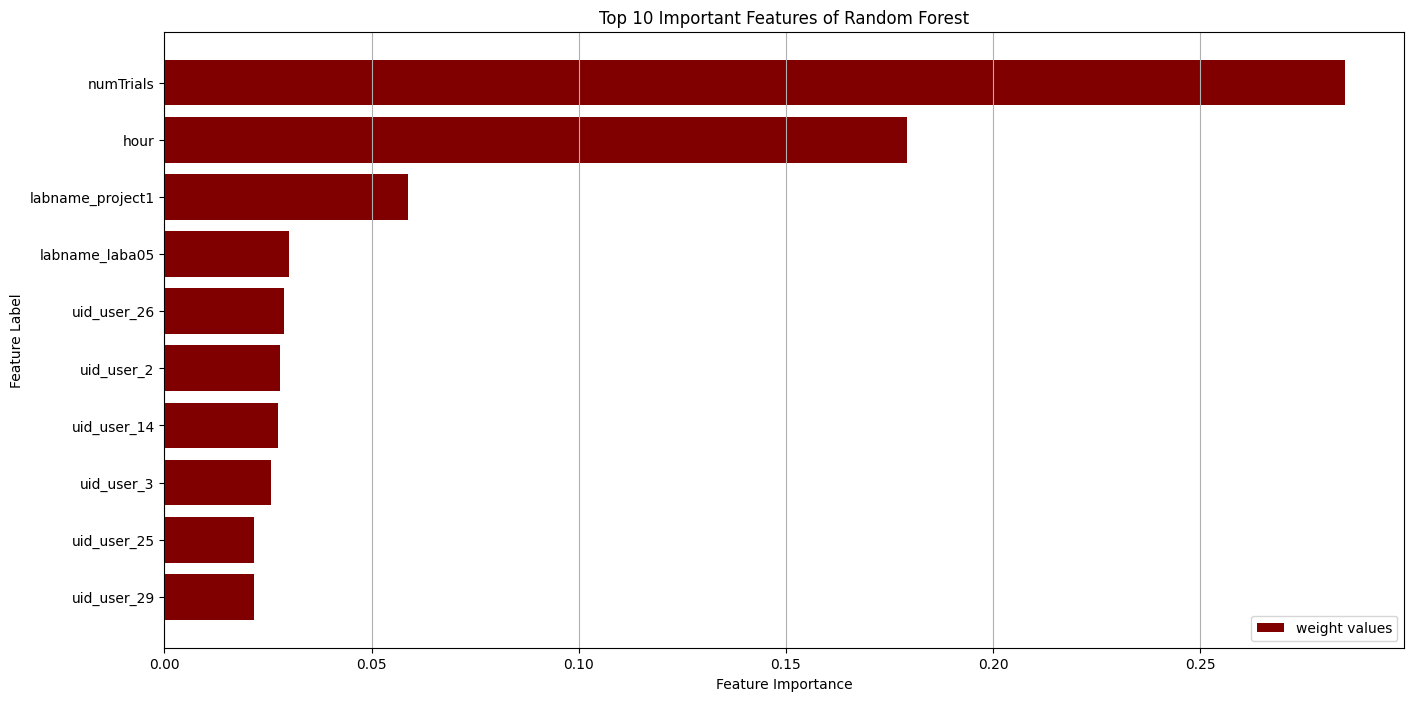

In [857]:
top_features_plot(
  coefficients=rfc.feature_importances_,
  feature_names=X.columns,
  model_name='Random Forest',
  top_n=10
)